In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('member_export_2023.csv', encoding="ISO-8859-1", low_memory=False)

Analysis of the following:
    
    In fact, the murderous outcome of 1996 was in many ways simply business as usual. Although a record number of people died in the spring climbing season on Everest, the 12 fatalities amounted to only 3 percent of the 398 climbers who ascended higher than Base Camp—which is actually slightly below the historical fatality rate of 3.3 percent. Or here’s another way to look at it: between 1921 and May 1996, 144 people died and the peak was climbed some 630 times—a ratio of one in four. Last spring, 12 climbers died and 84 reached the summit—a ratio of one in seven. Compared to these historical standards, 1996 was actually a safer-than-average year.

Krakauer, Jon. Into Thin Air (pp. 286-287). Knopf Doubleday Publishing Group. 

In [ ]:
# nowhere close to 398 climbers in basecamp in 1996.

In [4]:
count = df[(df['bconly'] == False) & (df['myear'] == 1996) & (df['mseason'] == 1) ].shape[0]

print(count)

293


In [ ]:
#Maybe he included all the people in BC, including non-climbers

In [6]:
count = df[ (df['myear'] == 1996) & (df['mseason'] == 1) ].shape[0]

print(count)

322


In [ ]:
# Still not close to his 398.  Maybe he included people from the rest of the year

In [14]:
count = df[ (df['myear'] == 1996)].shape[0]

print(count)

402


#### Ok, looks like that is what he did.  402 to 398 would be explained by updates to the Himalayan database
But the analysis would be wrong because he didn't include the deaths from the whole year, and including he said he only included people who "ascended higher than Base Camp."  

In [15]:
count_death = df[ (df['myear'] == 1996) & ((df['death'] == True) )].shape[0]
print(count_death)

15


In [16]:
count_death/count * 100

3.731343283582089

# nowhere close to 3%

    Let's get the real number

In [90]:
count = df[(df['bconly'] == False) & (df['myear'] == 1996) & (df['mseason'] == 1) ].shape[0]

print(count)
count_death = df[(df['bconly'] == False) & (df['myear'] == 1996) 
                 & (df['mseason'] == 1)  & (df['death'] == True)  ].shape[0]

print(round(count_death/count*100,1))


293
4.1


## And get the historical average prior to 1996

In [91]:
count = df[(df['bconly'] == False) & (df['myear'] < 1996)  ].shape[0]

print(count)
count_death = df[(df['bconly'] == False) & (df['myear'] < 1996) 
                 & (df['death'] == True)  ].shape[0]

print(round(count_death/count*100,1))

4797
2.7


In [ ]:
# Krakauer says historical average is 3.3.  Did he maybe include 1996 as well? 

In [30]:
count = df[(df['bconly'] == False) & (df['myear'] <= 1996)  ].shape[0]

print(count)
count_death = df[(df['bconly'] == False) & (df['myear'] <= 1996) 
                 & (df['death'] == True)  ].shape[0]

print(count_death/count*100)

5164
2.8079008520526725


In [28]:
# Let's try including the base camp only personel.

In [20]:
count = df[  (df['myear'] <= 1996)  ].shape[0]

print(count)
count_death = df[ (df['myear'] <= 1996) 
                 & (df['death'] == True)  ].shape[0]

print(count_death/count*100)

5639
2.748714311048058


In [ ]:
# Maybe he excluded the really only climbs:

In [19]:
count = df[ (df['myear'] > 1950) & (df['myear'] <= 1996)  ].shape[0]

print(count)
count_death = df[ (df['myear'] > 1953) & (df['myear'] <= 1996) 
                 & (df['death'] == True)  ].shape[0]

print(count_death/count*100)

5462
2.5631636763090446


# Still not close to 3.3 for a historical average.  Data was simply inaccurate.

# Let's do the analysis with the accurate data.

# Turns out 1996 was significantly more deadly than the historical average.
Let's break it down by year.

Note, for 1996, this included the fall season.

In [48]:
import pandas as pd


results = []

for year in range(1953, 1997):
    # Filter the DataFrame for the current year
    df_year = df[df['myear'] == year]
    
    # Calculate count_death for the current year
    count_death = df_year[(df_year['bconly'] == False) & (df_year['death'] == True)].shape[0]
    
    # Calculate count for the current year
    count = df_year[df_year['bconly'] == False].shape[0]
    
    # Calculate the percentage of deaths, handling division by zero
    if count > 0:
        death_percentage = (count_death / count) * 100
    else:
        death_percentage = 0
    
    # Append the results to the list
    results.append({'year': year, 'count_death': count_death, 'count': count, 'death_percentage': death_percentage})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


    year  count_death  count  death_percentage
0   1953            0     23          0.000000
1   1954            0      0          0.000000
2   1955            0      0          0.000000
3   1956            0     16          0.000000
4   1957            0      0          0.000000
5   1958            0      0          0.000000
6   1959            0      0          0.000000
7   1960            1     40          2.500000
8   1961            0      0          0.000000
9   1962            1     25          4.000000
10  1963            1     25          4.000000
11  1964            1      2         50.000000
12  1965            0     27          0.000000
13  1966            1      3         33.333333
14  1967            0      0          0.000000
15  1968            0      0          0.000000
16  1969            1     30          3.333333
17  1970            8     72         11.111111
18  1971            1     50          2.000000
19  1972            1     36          2.777778
20  1973     

## You can easily see the "avalanche" years.  

1970 - 5 deaths from avalanche 

1974 - 6 deaths from avalanche

1979 - 3 deaths from avalanche

1982 - 3 deaths from avalanche

1984 - 2 deaths from avalanche.

# Ruling out years with fewer than 5 climbers, 1996 was the third deadliest year on record once avalanche deaths are removed. 


In [47]:
import pandas as pd

# Assuming results_df is your DataFrame containing the data
# Create a dictionary of avalanche deaths by year
avalanche_deaths = {
    1970: 5,
    1974: 6,
    1979: 3,
    1982: 3,
    1984: 2
}

# Adjust the count_death for the avalanche years
for year, deaths in avalanche_deaths.items():
    results_df.loc[results_df['year'] == year, 'count_death'] -= deaths

# Filter to keep only the avalanche years
avalanche_years_df = results_df[results_df['year'].isin(avalanche_deaths.keys())]

# Recalculate the death_percentage as count_death / count * 100
avalanche_years_df['death_percentage'] = (avalanche_years_df['count_death'] / avalanche_years_df['count']) * 100

# Display the result
print(avalanche_years_df)


    year  count_death  count  death_percentage
17  1970            3     72          4.166667
21  1974            0     33          0.000000
26  1979            3     83          3.614458
29  1982            8    127          6.299213
31  1984            7    194          3.608247


/Users/michaeltracy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Looking at only non-sherpa as the HD data on porters can be off

In [79]:

results = []

for year in range(1953, 1997):
    # Filter the DataFrame for the current year
    df_year = df[df['myear'] == year]
    
    # Calculate count_death for the current year
    count_death = df_year[(df_year['bconly'] == False) 
                          & (df_year['death'] == True)
                         & (df_year['hired'] == False)].shape[0]
    
    # Calculate count for the current year
    count = df_year[(df_year['bconly'] == False) & (df_year['hired'] == False)].shape[0]
    
    # Calculate the percentage of deaths, handling division by zero
    if count > 0:
        death_percentage = (count_death / count) * 100
    else:
        death_percentage = 0
    
    # Append the results to the list
    results.append({'year': year, 'count_death': count_death, 'count': count, 'death_percentage': death_percentage})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


    year  count_death  count  death_percentage
0   1953            0     13          0.000000
1   1954            0      0          0.000000
2   1955            0      0          0.000000
3   1956            0     11          0.000000
4   1957            0      0          0.000000
5   1958            0      0          0.000000
6   1959            0      0          0.000000
7   1960            1     40          2.500000
8   1961            0      0          0.000000
9   1962            0     17          0.000000
10  1963            1     17          5.882353
11  1964            1      2         50.000000
12  1965            0     20          0.000000
13  1966            1      3         33.333333
14  1967            0      0          0.000000
15  1968            0      0          0.000000
16  1969            0     29          0.000000
17  1970            1     62          1.612903
18  1971            1     48          2.083333
19  1972            1     32          3.125000
20  1973     

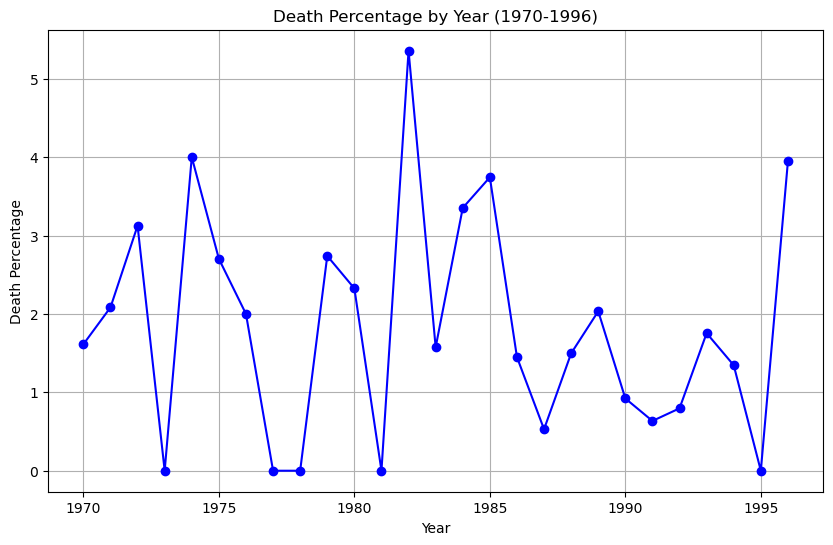

In [84]:
results = []

for year in range(1970, 1997):
    # Filter the DataFrame for the current year
    df_year = df[df['myear'] == year]
    
    # Calculate count_death for the current year
    count_death = df_year[(df_year['bconly'] == False) 
                          & (df_year['death'] == True)
                         & (df_year['hired'] == False)].shape[0]
    
    # Calculate count for the current year
    count = df_year[(df_year['bconly'] == False) & (df_year['hired'] == False)].shape[0]
    
    # Calculate the percentage of deaths, handling division by zero
    if count > 0:
        death_percentage = (count_death / count) * 100
    else:
        death_percentage = 0
    
    # Append the results to the list
    results.append({'year': year, 'count_death': count_death, 'count': count, 'death_percentage': death_percentage})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(results_df['year'], results_df['death_percentage'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Death Percentage by Year (1970-1996)')
plt.xlabel('Year')
plt.ylabel('Death Percentage')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# 1982 -- Peter Boardman, Joe Tasker, and Marty Hoey all perished.

# And hisorical average of western climbers

In [76]:
count = df[  (df['myear'] < 1996) & (df['hired'] == False) & (df['bconly'] == False)   ].shape[0]

print(count)
count_death = df[  (df['myear'] < 1996) 
                 & (df['hired'] == False) 
                 & (df['bconly'] == False) 
                 & (df['death'] == True)].shape[0]

print(count_death/count*100)

4183
1.6734401147501792


In [ ]:
# And just the 1996 spring season. 

In [77]:
count = df[  (df['myear'] == 1996) & (df['mseason'] == 1) 
           & (df['hired'] == False) & (df['bconly'] == False)   ].shape[0]

print(count)
count_death = df[  (df['myear'] == 1996) 
                 & (df['mseason'] == 1)
                 & (df['hired'] == False) 
                 & (df['bconly'] == False) 
                 & (df['death'] == True)].shape[0]

print(count_death/count*100)

248
4.435483870967742


# Summits to Death ratio

In [35]:
count = df[ (df['myear'] < 1996) & (df['msuccess'] == True)].shape[0]

print(count)

746


In [39]:
count_death = df[ (df['myear'] < 1996) & ((df['death'] == True) )].shape[0]
print(count_death)

140


In [40]:
746/140

5.328571428571428

In [ ]:
# This data was simply not accurate back in 1996

In [14]:
count = df[ (df['myear'] < 1996) & (df['msuccess'] == True) & (df['mseason'] == 1)].shape[0]

print(count)

485


In [86]:


results = []

for year in range(1921, 1997):
    # Filter the DataFrame for the current year
    df_year = df[df['myear'] == year]
    
    # Calculate count_death for the current year
    count_death = df_year[(df_year['bconly'] == False) & (df_year['death'] == True)].shape[0]
    
    # Calculate count for the current year
    count = df_year[df_year['bconly'] == False].shape[0]
    
    # Calculate the percentage of deaths, handling division by zero
    if count > 0:
        death_percentage = (count_death / count) * 100
    else:
        death_percentage = 0
    
    # Append the results to the list
    results.append({'year': year, 'count_death': count_death, 'count': count, 'death_percentage': death_percentage})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


    year  count_death  count  death_percentage
0   1921            2     11         18.181818
1   1922            7     21         33.333333
2   1923            0      0          0.000000
3   1924            2      9         22.222222
4   1925            0      0          0.000000
..   ...          ...    ...               ...
71  1992            6    428          1.401869
72  1993            6    350          1.714286
73  1994            4    268          1.492537
74  1995            3    266          1.127820
75  1996           15    367          4.087193

[76 rows x 4 columns]


# Looking at the summit/death ratio


In [87]:
results = []

for year in range(1953, 1997):
    # Filter the DataFrame for the current year
    df_year = df[df['myear'] == year]
    
    # Calculate count_death for the current year
    count_death = df_year[ (df_year['death'] == True)].shape[0]
    
    # Calculate count for the current year
    count_summit = df_year[df_year['msuccess'] == True].shape[0]
    
    # Calculate the percentage of deaths, handling division by zero
    if count_death > 0:
        summit_ratio = (count_summit / count_death) 
    else:
        summit_ratio = 0

    results.append({'year': year, 'count_summit': count_summit, 'count_death': count_death, 'summit_ratio': summit_ratio})

results_df = pd.DataFrame(results)
print(results_df)


    year  count_summit  count_death  summit_ratio
0   1953             2            0      0.000000
1   1954             0            0      0.000000
2   1955             0            0      0.000000
3   1956             4            0      0.000000
4   1957             0            0      0.000000
5   1958             0            0      0.000000
6   1959             0            0      0.000000
7   1960             3            1      3.000000
8   1961             0            0      0.000000
9   1962             0            1      0.000000
10  1963             6            1      6.000000
11  1964             0            1      0.000000
12  1965             9            0      0.000000
13  1966             0            1      0.000000
14  1967             0            0      0.000000
15  1968             0            0      0.000000
16  1969             0            1      0.000000
17  1970             4            8      0.500000
18  1971             0            1      0.000000


# Let's duplicate the data from the 2003 article

We analyze data for “climbers” (that is, individuals listed on a climbing permit) sepa-
rately from those for locally hired high-altitude porters (hereafter “H-A porters”) because
most climbers are trying to summit, whereas many H-A porters are not. Climbers are usually
foreigners but are sometimes Nepali or Tibetan. Foreign guides are considered as climbers, as
per permit policies. Most H-A porters are Sherpas, but some are from other ethnic groups
such as Tamangs, Gurungs, or Tibetans. We include only those climbers and H-A porters who
went above base camp. Expeditions with multiple independent teams (several teams on the
same summit) were treated as separate expeditions. Our analyses for spring 1980 through
autumn 2002 are based on 5,218 climbers, 3,276 H-A porters, and 627 expeditions. We exclude
several Chinese expeditions, for which climbers and H-A porters were not distinguished.
Many climbers and H-A porters have made repeated attempts on multiple expeditions, but we
here treat each attempt as if it were statistically independent. 

In [36]:
count = df[ (df['myear'] >= 1980) & (df['myear'] <= 2002) 
                 & (df['bconly'] == False) & (df['hired'] == False) ].shape[0]
print(count)

5270


This matches closely with the 5218 in the article as they say the article also exluded some unnamed Chinese expeditions.
The data in the Himalayan database for total high altitude porter engagement is not accurate and will not be used here.
The main problem with HD tracking of H-A porters is that it matches on name, and this causes the different individuals to be identified as the same person.  Krakauer's analysis did not break out climbers vs H-A porters as the 2003 article does.  

In [51]:
count = df[ (df['myear'] >= 1980) & (df['myear'] <= 2002) 
                 & (df['bconly'] == False) & (df['hired'] == False) & (df['msuccess'] == True) &  (df['mseason'] == 1) ].shape[0]
print(count)

count = df[ (df['myear'] >= 1980) & (df['myear'] <= 2002) 
                 & (df['bconly'] == False) & (df['hired'] == False)  &  (df['mseason'] == 1) ].shape[0]
print(count)

812
3195


Article lists 25.2% of 3101.  As above, it is not clear which Chinese expeditions were excluded.  We get 25.4%.

In [53]:
812/3195

0.2541471048513302

Now, let's compare the death rate.  Article has 1.8% (For spring season)

In [69]:
count = df[ (df['myear'] >= 1980) & (df['myear'] <= 2002) 
                 & (df['bconly'] == False) & (df['hired'] == False) & (df['death'] == True) &  (df['mseason'] == 1) ].shape[0]
print(count)

count = df[ (df['myear'] >= 1980) & (df['myear'] <= 2002) 
                 & (df['bconly'] == False) & (df['hired'] == False)  &  (df['mseason'] == 1) ].shape[0]
print(count)

57
3195


In [71]:
57/3195*100

1.784037558685446

Given the agreement on the success rate and death rate between the current HD and the data used in a 2003 article publised in American Alpine Journal, the data, at least for western climber, was fairly stable beginning in 2003.

In [ ]:
Breakdown by year -- spring only

In [88]:
results = []

for year in range(1953, 1997):
    # Filter the DataFrame for the current year
    df_year = df[df['myear'] == year]
    
    # Calculate count_death for the current year
    count_death = df_year[(df_year['bconly'] == False) 
                          & (df_year['death'] == True)
                         & (df_year['hired'] == False)
                         & (df_year['mseason'] == 1)].shape[0]
    
    # Calculate count for the current year
    count = df_year[(df_year['bconly'] == False) 
                    & (df_year['hired'] == False)
                   & (df_year['mseason'] == 1)].shape[0]
    
    # Calculate the percentage of deaths, handling division by zero
    if count > 0:
        death_percentage = (count_death / count) * 100
    else:
        death_percentage = 0
    
    results.append({'year': year, 'count_death': count_death, 'count': count, 'death_percentage': death_percentage})

results_df = pd.DataFrame(results)
print(results_df)


    year  count_death  count  death_percentage
0   1953            0     13          0.000000
1   1954            0      0          0.000000
2   1955            0      0          0.000000
3   1956            0     11          0.000000
4   1957            0      0          0.000000
5   1958            0      0          0.000000
6   1959            0      0          0.000000
7   1960            1     40          2.500000
8   1961            0      0          0.000000
9   1962            0     17          0.000000
10  1963            1     17          5.882353
11  1964            1      2         50.000000
12  1965            0     20          0.000000
13  1966            1      3         33.333333
14  1967            0      0          0.000000
15  1968            0      0          0.000000
16  1969            0      5          0.000000
17  1970            1     62          1.612903
18  1971            1     28          3.571429
19  1972            0     21          0.000000
20  1973     

Data matches closely with the graphs printed int he article